## Install Libraries

In [40]:
#!pip3 install -r requirements_current.txt

In [ ]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [1]:
import importlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import models
import parameters
import preprocessing

/Users/craig/opt/anaconda3/envs/dsa_modelling/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
importlib.reload(models)
#  importlib.reload(parameters)
#  importlib.reload(preprocessing)

<module 'models' from '/Users/craig/Documents/GitHub/DSA4263-Project/models.py'>

# Import Dataset

In [5]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [ ]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [ ]:
rf_model.train(baseline=True)
rf_model.predict(baseline=True)

In [ ]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate(baseline=True)

{'accuracy': 0.815,
 'precision': 0.6363636363636364,
 'recall': 0.5714285714285714,
 'f1_score': 0.6021505376344085}

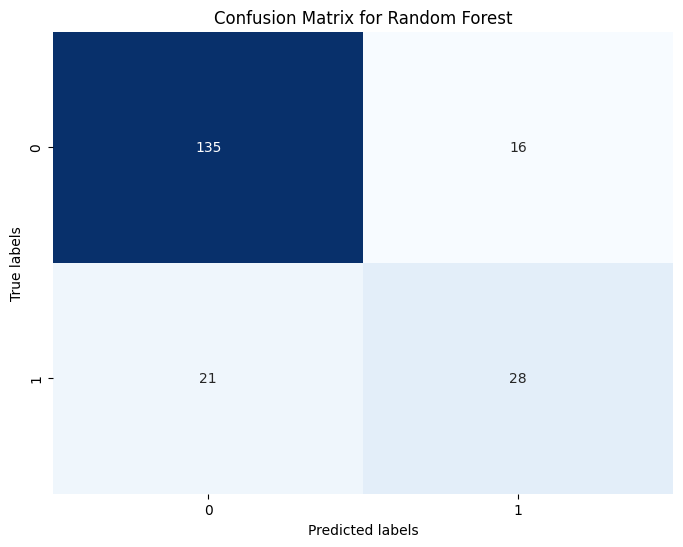

In [ ]:
cm_rf_base = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:21,  5.23it/s]                         


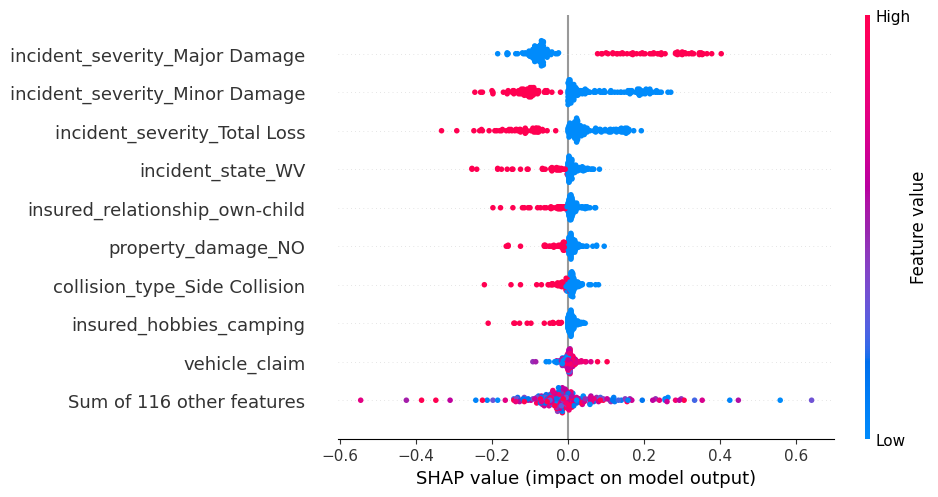

In [ ]:
rf_model.shap_explanation(baseline=True)

## Results with Tuning

In [ ]:
rf_model.finetune()

[I 2024-04-07 16:00:36,414] A new study created in memory with name: no-name-5e80b7a2-eec2-4f80-9f18-9cbc1aa20745
[I 2024-04-07 16:00:41,335] Trial 0 finished with value: 0.5906697108870781 and parameters: {'n_estimators': 100, 'max_depth': 8, 'criterion': 'log_loss', 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.5906697108870781.
[I 2024-04-07 16:00:44,031] Trial 1 finished with value: 0.6230506369190603 and parameters: {'n_estimators': 300, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6230506369190603.
[I 2024-04-07 16:00:47,167] Trial 2 finished with value: 0.6288224072741396 and parameters: {'n_estimators': 150, 'max_depth': 1, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6288224072741396.
[I 2024

(0.7325896502261945,
 {'n_estimators': 450,
  'max_depth': 3,
  'criterion': 'gini',
  'min_samples_split': 5,
  'min_samples_leaf': 6,
  'max_features': None,
  'bootstrap': True})

In [ ]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

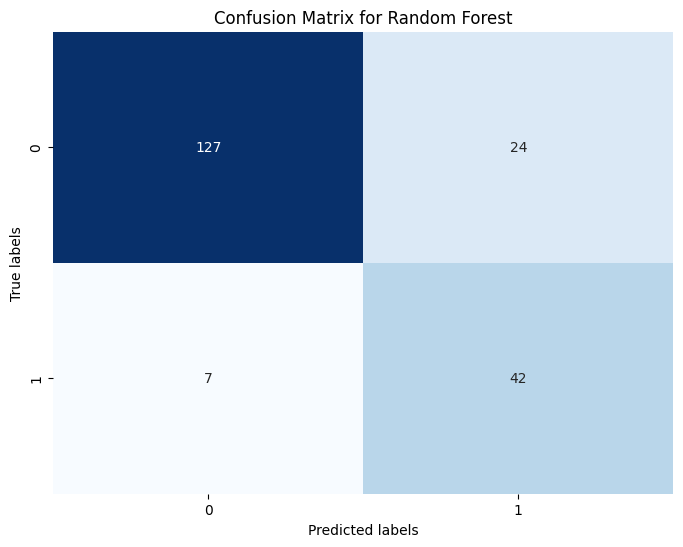

In [ ]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

PermutationExplainer explainer: 201it [01:30,  1.97it/s]                         


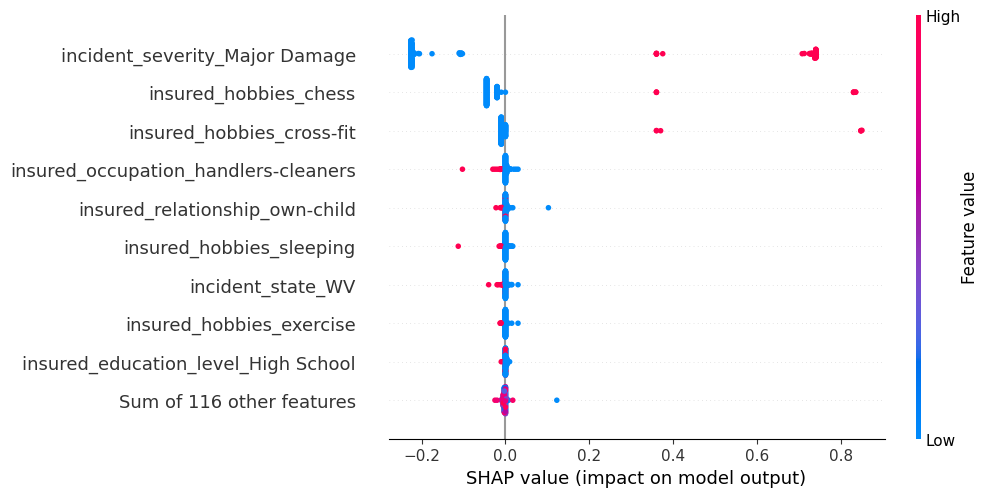

In [ ]:
rf_model.shap_explanation()

### Random Oversampling

In [ ]:
rf_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-07 17:24:33,139] A new study created in memory with name: no-name-032fed89-556b-4c02-b1c8-6732b8637114


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:24:34,591] Trial 0 finished with value: 0.6732599951649348 and parameters: {'n_estimators': 500, 'max_depth': 4, 'criterion': 'gini', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.6732599951649348.
[I 2024-04-07 17:24:35,787] Trial 1 finished with value: 0.6876455207398225 and parameters: {'n_estimators': 350, 'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.6876455207398225.
[I 2024-04-07 17:24:37,002] Trial 2 finished with value: 0.6189524025924844 and parameters: {'n_estimators': 400, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.6876455207398225.
[I 2024-04-07 17:24:37,998] Trial 3 finished with value: 0.7126831367943839 and parameters: {'n_estimators': 300, 'max_de

(0.7549580712788261,
 {'n_estimators': 450,
  'max_depth': 4,
  'criterion': 'entropy',
  'min_samples_split': 7,
  'min_samples_leaf': 10,
  'max_features': None,
  'bootstrap': True})

In [ ]:
rf_model.train_predict(oversampling_strategy = "RandomOverSampler")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

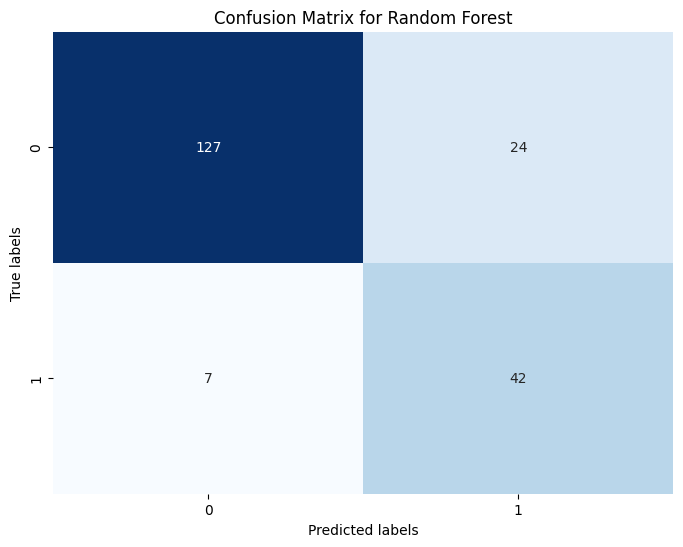

In [ ]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:37,  1.85it/s]                         


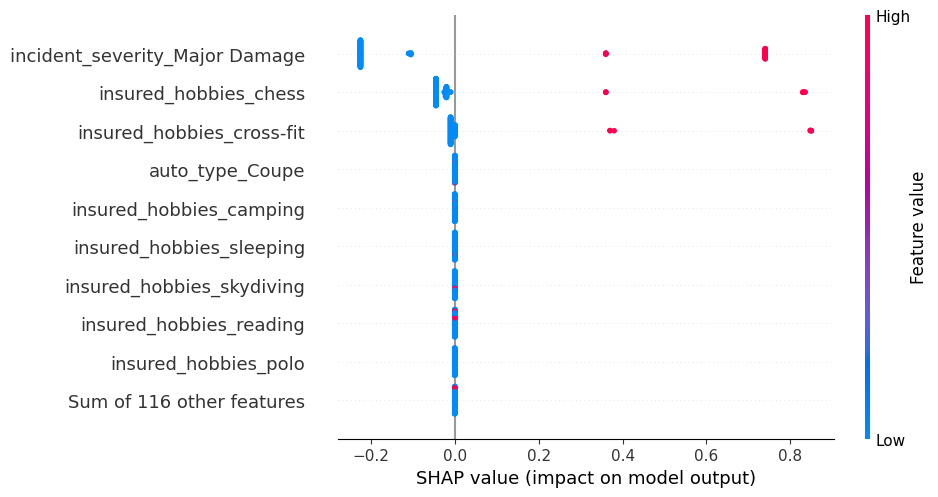

In [ ]:
rf_model.shap_explanation()

### ADASYN

In [ ]:
rf_model.finetune(oversampling_strategy = "ADASYN")

[I 2024-04-07 17:10:44,923] A new study created in memory with name: no-name-740bc999-7b09-4418-8e37-17d87cd16f88


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:10:47,413] Trial 0 finished with value: 0.5692152605459057 and parameters: {'n_estimators': 450, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5692152605459057.
[I 2024-04-07 17:10:51,141] Trial 1 finished with value: 0.6983333333333333 and parameters: {'n_estimators': 250, 'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.6983333333333333.
[I 2024-04-07 17:10:54,047] Trial 2 finished with value: 0.47438056523422373 and parameters: {'n_estimators': 450, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.6983333333333333.
[I 2024-04-07 17:10:57,166] Trial 3 finished with value: 0.47438056523422373 and parameters: {'n_estimators': 500, 'max_

(0.7486436077293129,
 {'n_estimators': 400,
  'max_depth': 4,
  'criterion': 'entropy',
  'min_samples_split': 8,
  'min_samples_leaf': 1,
  'max_features': None,
  'bootstrap': False})

In [ ]:
rf_model.train_predict(oversampling_strategy = "ADASYN")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

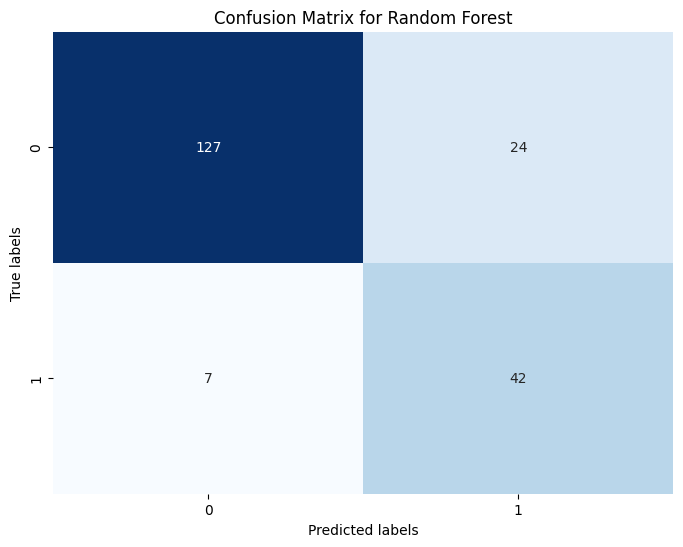

In [ ]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:19,  2.19it/s]                         


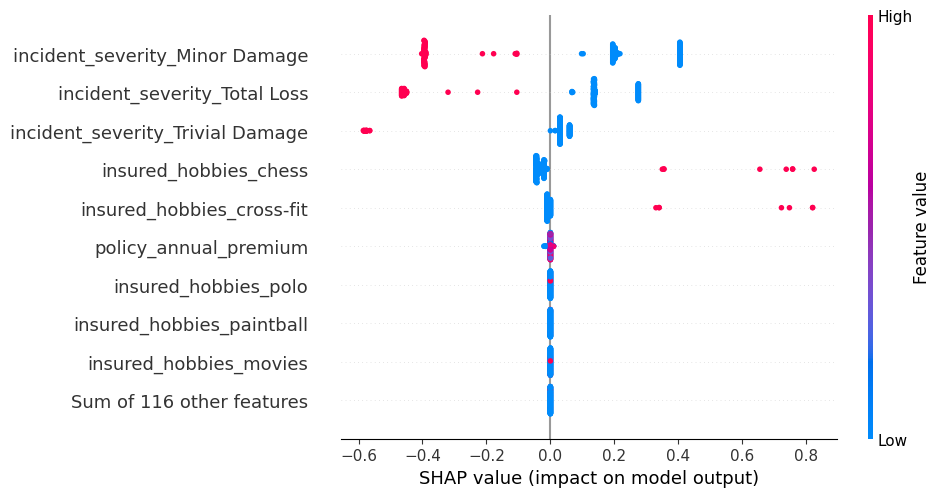

In [ ]:
rf_model.shap_explanation()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [ ]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [ ]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [ ]:
dt_model.train(baseline=True)
dt_model.predict(baseline=True)

In [ ]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate(baseline=True)

{'accuracy': 0.765,
 'precision': 0.5178571428571429,
 'recall': 0.5918367346938775,
 'f1_score': 0.5523809523809524}

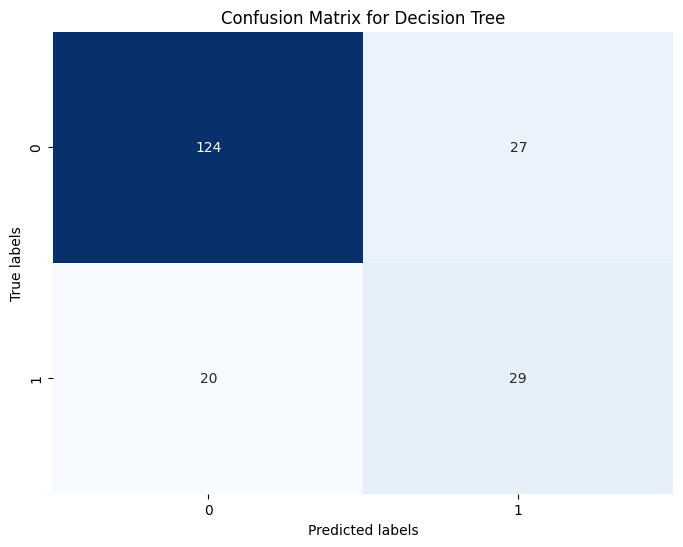

In [ ]:
cm_dt_base = dt_model.plot_confusion_matrix()

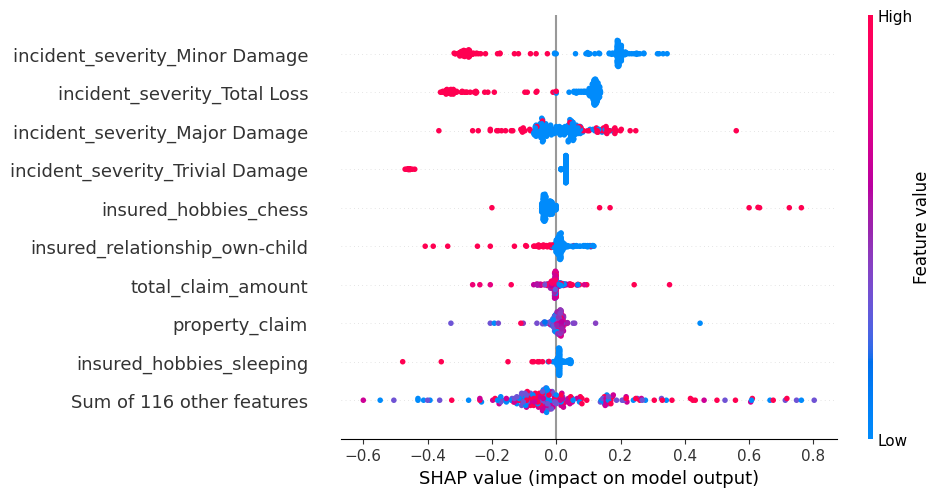

In [ ]:
dt_model.shap_explanation()

## Results with Tuning

In [ ]:
dt_model.finetune()

[I 2024-04-10 23:45:27,992] A new study created in memory with name: no-name-0e5befcf-9a9f-4e1d-ad7d-2b2caa8c56bd
[I 2024-04-10 23:45:29,208] Trial 0 finished with value: 0.6488716411101407 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6488716411101407.
[I 2024-04-10 23:45:30,383] Trial 1 finished with value: 0.6527325906207894 and parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6527325906207894.
[I 2024-04-10 23:45:31,567] Trial 2 finished with value: 0.5997136226731842 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6527325906207894.
[I 2024-04-10 23:45:32,796] Trial 3 finished with value: 0.6659290213363023 and parameters: {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.6659290213363023.
[I 2024-04-10 23:45:33,986] Trial 4 finished with value: 0.6501117

(0.6659290213363023,
 {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1})

In [ ]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6229508196721312,
 'recall': 0.7755102040816326,
 'f1_score': 0.6909090909090909}

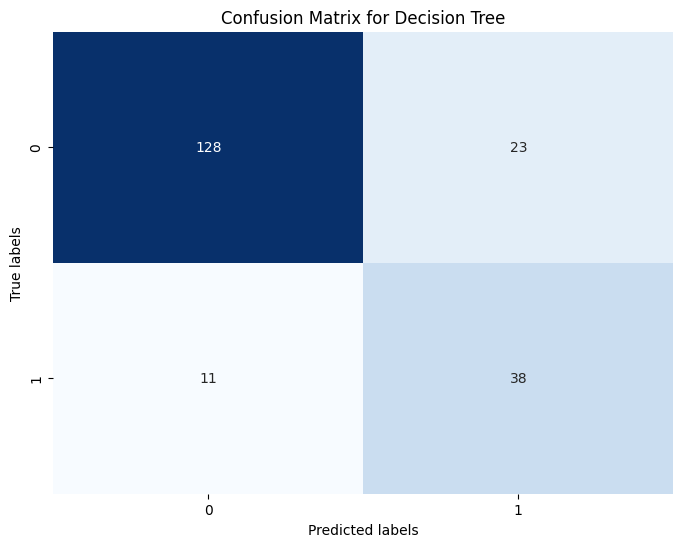

In [ ]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

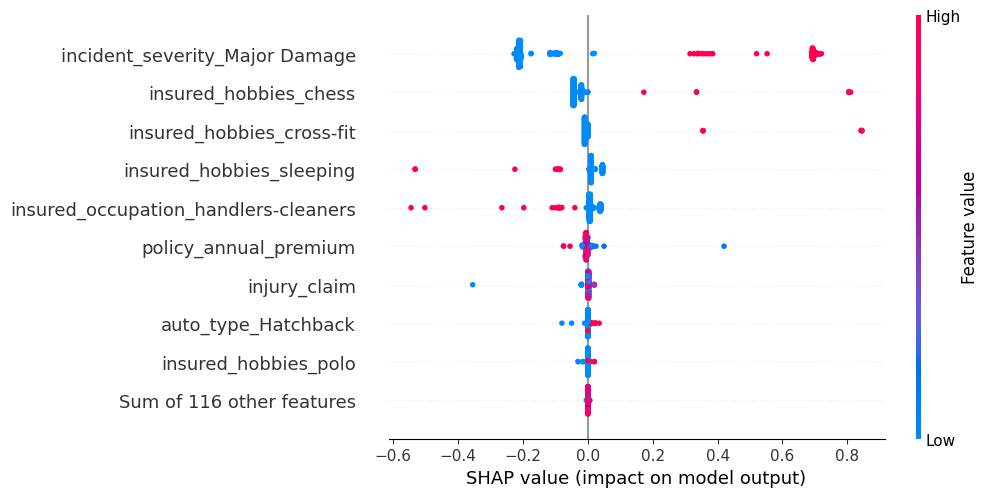

In [ ]:
dt_model.shap_explanation()

[Text(0.52, 0.9, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.26, 0.7, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.16, 0.5, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.08, 0.3, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.04, 0.1, 'gini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.12, 0.1, 'gini = 0.106\nsamples = 267\nvalue = [252, 15]\nclass = Y'),
 Text(0.24, 0.3, 'total_claim_amount <= 3545.0\ngini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = N'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Y'),
 Text(0.28, 0.1, 'gini = 0.121\nsamples = 31\nvalue = [2, 29]\nclass = N'),
 Text(0.36, 0.5, 'injury_claim <= 180.0\ngini = 0.161\nsamples = 34\nvalue = [3, 31]\nclass = N'),
 Text(0.32, 0.3, 'gini = 0.0\n

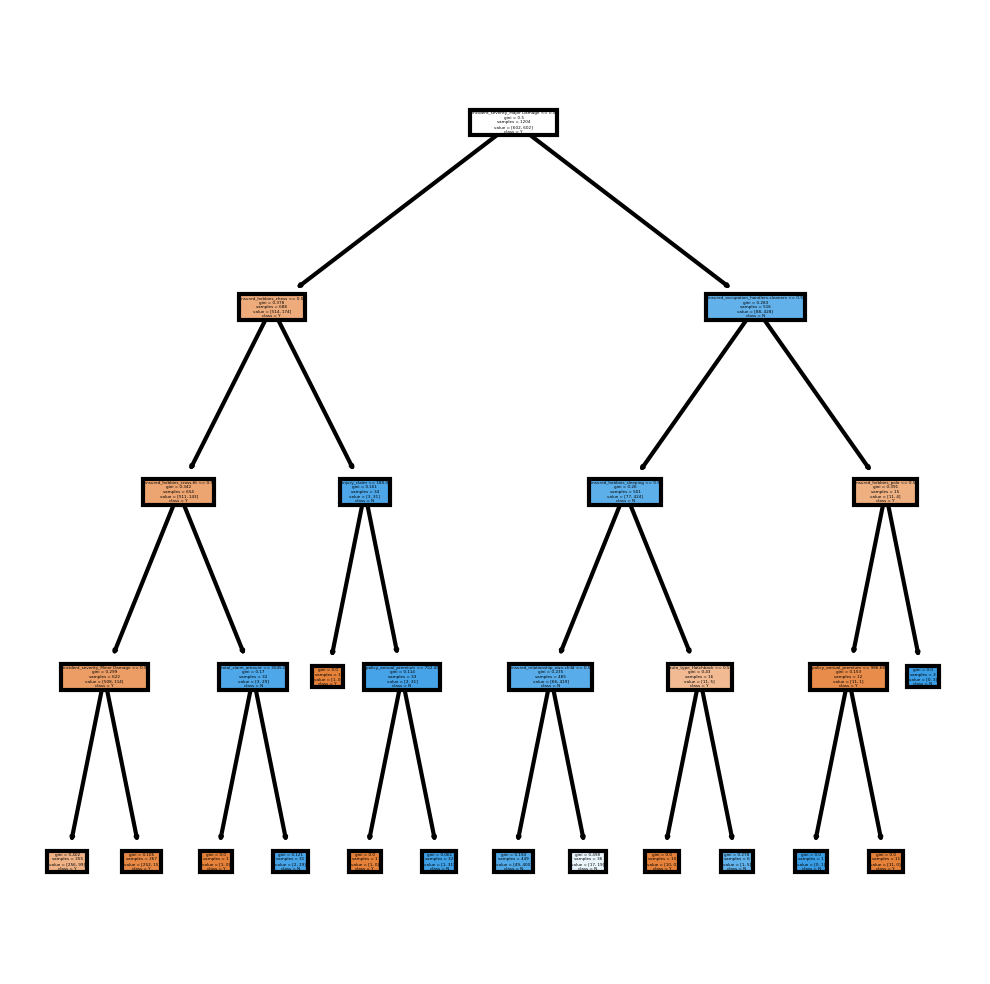

In [ ]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names,
               class_names=class_names,
               filled = True)

## Using Random Oversampling

In [ ]:
dt_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-10 23:47:44,746] A new study created in memory with name: no-name-34684f00-da0e-49cc-bb89-b9819ba4a623
[I 2024-04-10 23:47:44,859] Trial 0 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-10 23:47:44,894] Trial 1 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-10 23:47:44,934] Trial 2 finished with value: 0.714522250236536 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.714522250236536.


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-10 23:47:44,969] Trial 3 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.714522250236536.
[I 2024-04-10 23:47:45,017] Trial 4 finished with value: 0.6618194488550156 and parameters: {'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.714522250236536.
[I 2024-04-10 23:47:45,054] Trial 5 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.714522250236536.
[I 2024-04-10 23:47:45,099] Trial 6 finished with value: 0.7174639674639675 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.7174639674639675.
[I 2024-04-10 23:47:45,141] Trial 7 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 6 with valu

(0.7236263823440748,
 {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 5})

In [ ]:
dt_model.train_predict(oversampling_strategy = 'RandomOverSampler')
dt_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6,
 'recall': 0.7346938775510204,
 'f1_score': 0.6605504587155964}

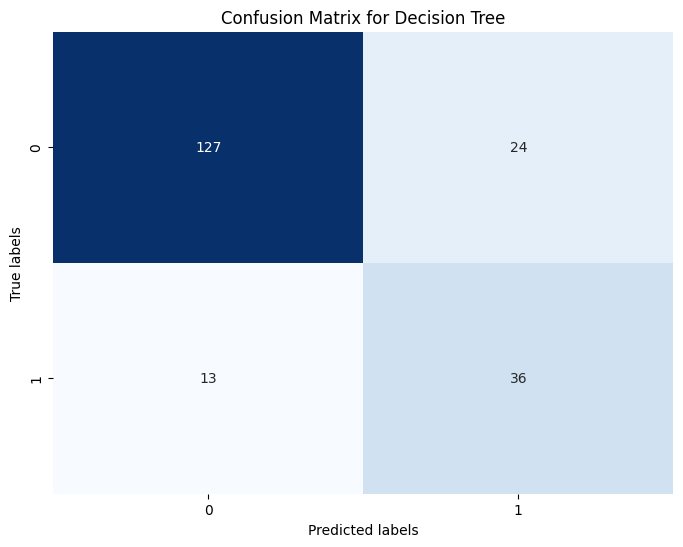

In [ ]:
cm_dt = dt_model.plot_confusion_matrix()

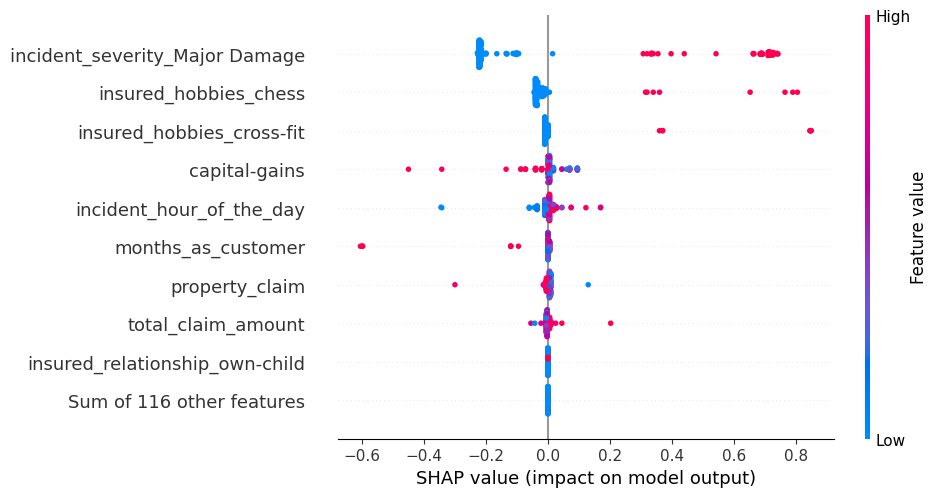

In [ ]:
dt_model.shap_explanation()

## Using ADASYN

In [ ]:
dt_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-10 23:44:04,151] A new study created in memory with name: no-name-607e9f5e-459e-4835-88b9-8268ea238884
[I 2024-04-10 23:44:04,261] Trial 0 finished with value: 0.6660654541408932 and parameters: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6660654541408932.
[I 2024-04-10 23:44:04,350] Trial 1 finished with value: 0.7142752808749955 and parameters: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7142752808749955.


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-10 23:44:04,424] Trial 2 finished with value: 0.47522029461459747 and parameters: {'max_depth': 1, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7142752808749955.
[I 2024-04-10 23:44:04,505] Trial 3 finished with value: 0.5758628439767053 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7142752808749955.
[I 2024-04-10 23:44:04,602] Trial 4 finished with value: 0.6660654541408932 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7142752808749955.
[I 2024-04-10 23:44:04,764] Trial 5 finished with value: 0.5884650455927052 and parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7142752808749955.
[I 2024-04-10 23:44:04,844] Trial 6 finished with value: 0.5758628439767053 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with

(0.7353012308568007,
 {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 4})

In [ ]:
dt_model.train_predict(oversampling_strategy = "ADASYN")
dt_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.6176470588235294,
 'recall': 0.8571428571428571,
 'f1_score': 0.717948717948718}

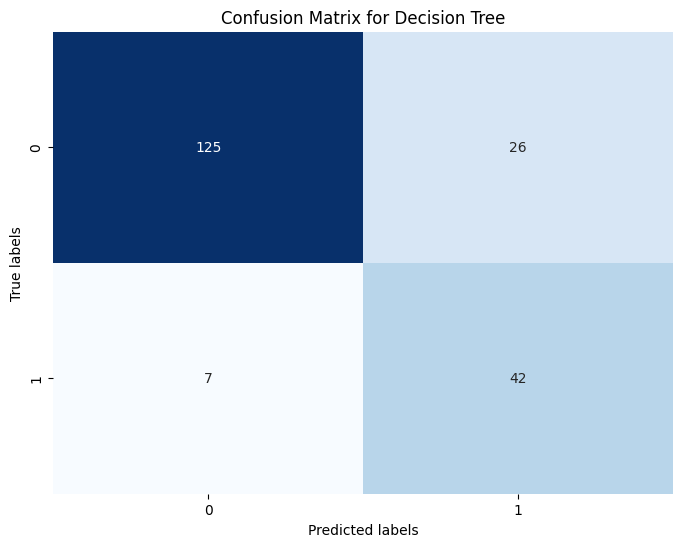

In [ ]:
cm_dt = dt_model.plot_confusion_matrix()

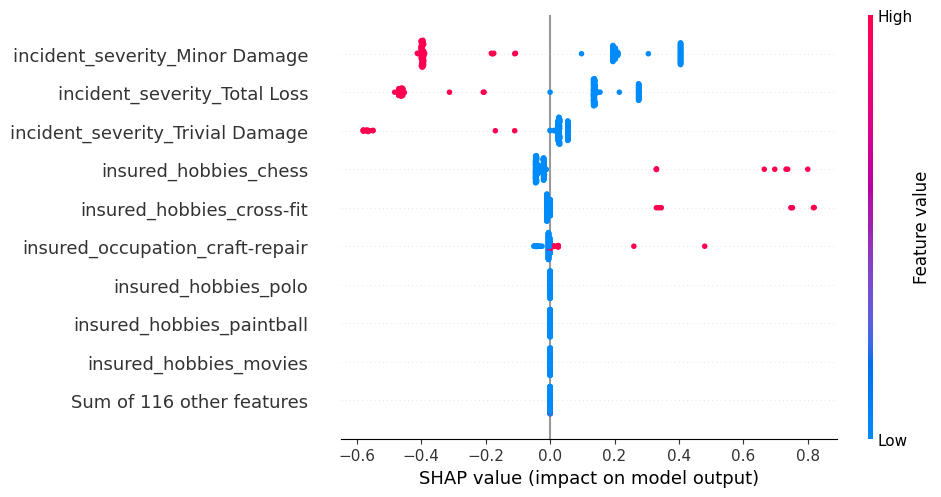

In [ ]:
dt_model.shap_explanation()

# XGBoost

## Dataset and Model Creation

In [62]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = False,
    )

In [63]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]
rows_with_nan.shape

(0, 125)

In [64]:
X_train_xgb.dtypes

months_as_customer     int64
age                    int64
policy_state_OH        uint8
policy_state_IN        uint8
policy_state_IL        uint8
                       ...  
auto_type_Truck        uint8
auto_type_Sedan        uint8
auto_type_SUV          uint8
auto_type_Hatchback    uint8
auto_type_Coupe        uint8
Length: 125, dtype: object

## Model Creation

In [65]:
import xgboost as xgb

In [66]:
xgb_static_params = {
     "random_state": 42,
}

In [67]:
xgb_model = models.IndividualModel(
    model_func = xgb.XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## SMOTENC Results with no tuning

In [68]:
xgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=True)

{'accuracy': 0.82,
 'precision': 0.6511627906976745,
 'recall': 0.5714285714285714,
 'f1_score': 0.6086956521739131}

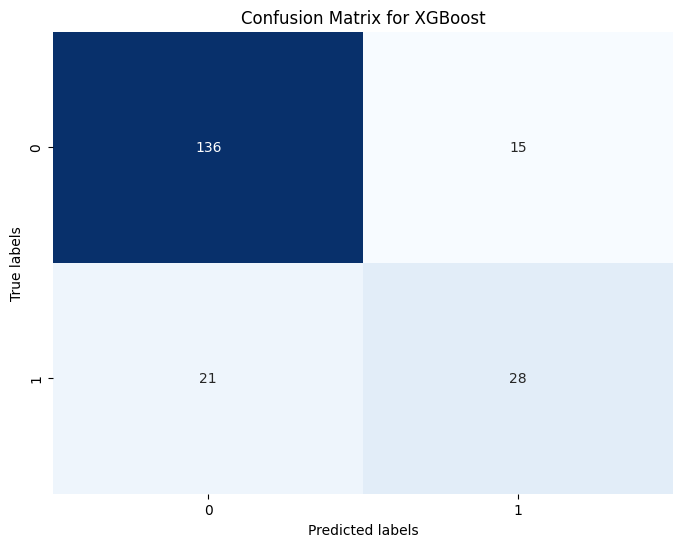

In [69]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

###  Model Explanation

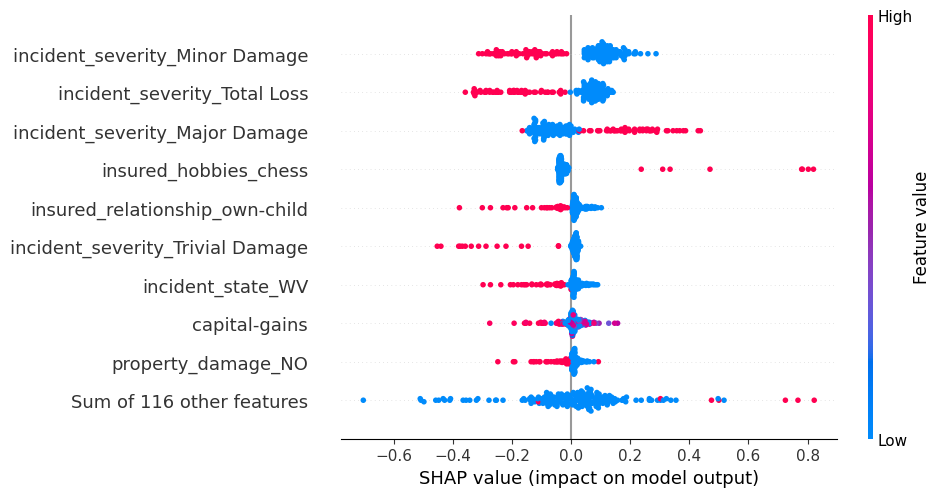

In [49]:
xgb_model.shap_explanation(baseline=True)

<Axes: title={'center': 'Untuned XGBoost Feature Importance (SMOTENC)'}, xlabel='F score', ylabel='Features'>

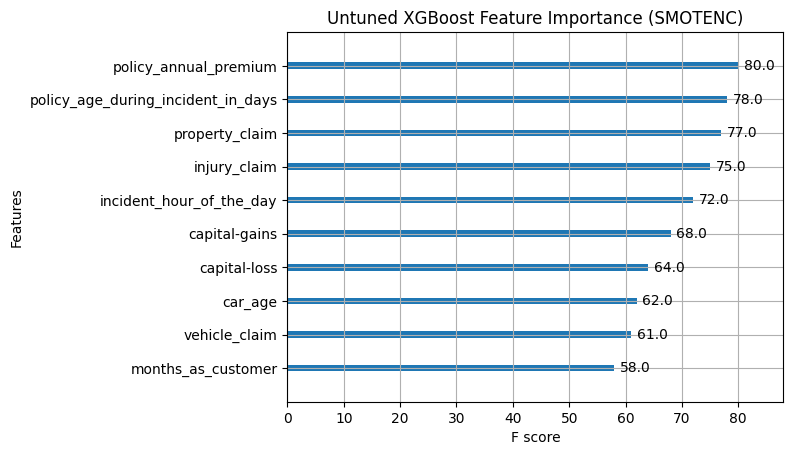

In [50]:
xgb.plot_importance(xgb_model.baseline_model, title="Untuned XGBoost Feature Importance (SMOTENC)", max_num_features=10)

## SMOTENC Results with Tuning

In [70]:
xgb_model.finetune(oversampling_strategy="SMOTENC")

[I 2024-04-11 14:31:18,756] A new study created in memory with name: no-name-7ca6a48f-bfa7-483f-a863-86820a220cd9
[I 2024-04-11 14:31:21,399] Trial 0 finished with value: 0.624759435686265 and parameters: {'n_estimators': 28, 'max_depth': 13, 'learning_rate': 0.47000000000000003, 'subsample': 1.0, 'colsample_bytree': 0.5, 'gamma': 3.1, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 4.5}. Best is trial 0 with value: 0.624759435686265.
[I 2024-04-11 14:31:23,925] Trial 1 finished with value: 0.6908849898775667 and parameters: {'n_estimators': 11, 'max_depth': 24, 'learning_rate': 0.23, 'subsample': 0.8, 'colsample_bytree': 0.95, 'gamma': 4.6000000000000005, 'reg_alpha': 2.6, 'reg_lambda': 0.2}. Best is trial 1 with value: 0.6908849898775667.
[I 2024-04-11 14:31:27,196] Trial 2 finished with value: 0.63785176849727 and parameters: {'n_estimators': 244, 'max_depth': 31, 'learning_rate': 0.27, 'subsample': 1.0, 'colsample_bytree': 0.35000000000000003, 'gamma': 2.1, 'reg_alpha': 1.900000000

(0.7615416659373742,
 {'n_estimators': 64,
  'max_depth': 30,
  'learning_rate': 0.01,
  'subsample': 0.95,
  'colsample_bytree': 0.95,
  'gamma': 0.6000000000000001,
  'reg_alpha': 3.6,
  'reg_lambda': 3.8000000000000003})

In [71]:
xgb_model.train_predict_eval(oversampling_strategy="SMOTENC", baseline=False)

{'accuracy': 0.84,
 'precision': 0.6440677966101694,
 'recall': 0.7755102040816326,
 'f1_score': 0.7037037037037036}

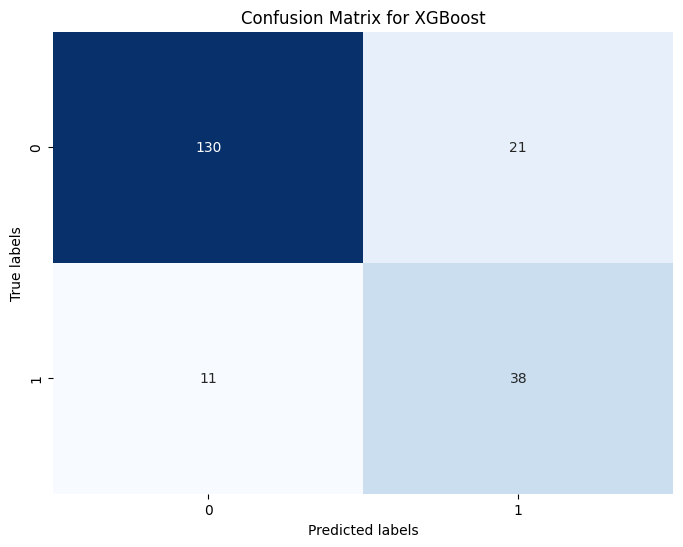

In [72]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

### Tuned Model Explanation

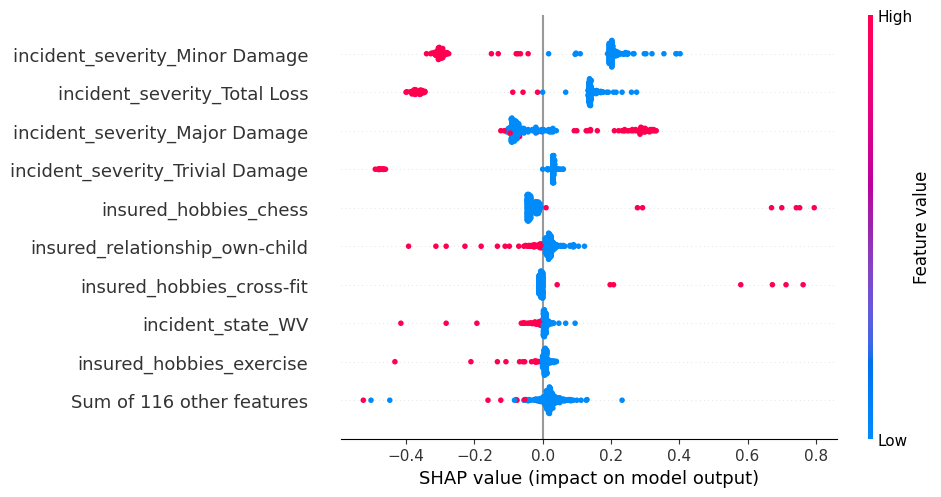

In [73]:
xgb_model.shap_explanation(baseline=False)

<Axes: title={'center': 'Tuned XGBoost Feature Importance (SMOTENC)'}, xlabel='F score', ylabel='Features'>

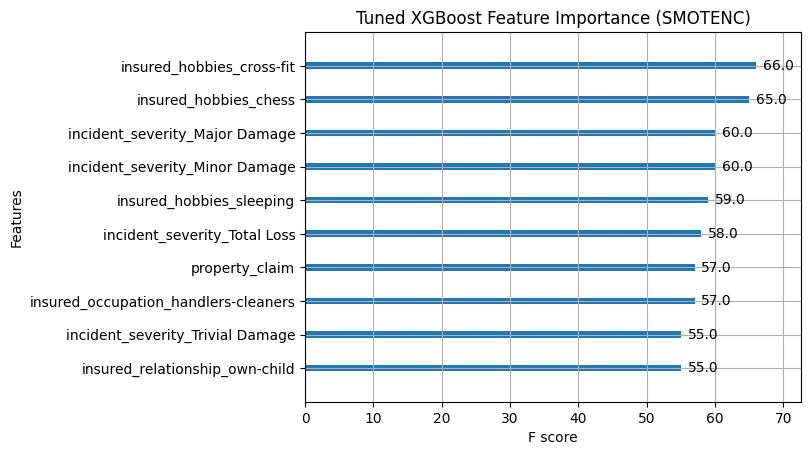

In [74]:
xgb.plot_importance(xgb_model.tuned_model, title="Tuned XGBoost Feature Importance (SMOTENC)", max_num_features=10)

## ANASYN Results with Tuning

In [ ]:
xgb_model.finetune(oversampling_strategy="ADASYN")

[I 2024-04-07 21:19:53,845] A new study created in memory with name: no-name-e0a235f2-f5d1-4645-b01d-21fcd471d271


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 21:19:54,682] Trial 0 finished with value: 0.6540040865211865 and parameters: {'n_estimators': 213, 'max_depth': 27, 'learning_rate': 0.36000000000000004, 'subsample': 0.7, 'colsample_bytree': 0.6000000000000001, 'gamma': 1.9000000000000001, 'reg_alpha': 2.9000000000000004, 'reg_lambda': 2.7}. Best is trial 0 with value: 0.6540040865211865.
[I 2024-04-07 21:19:54,990] Trial 1 finished with value: 0.620582298520754 and parameters: {'n_estimators': 27, 'max_depth': 11, 'learning_rate': 0.16, 'subsample': 0.5, 'colsample_bytree': 0.75, 'gamma': 4.1000000000000005, 'reg_alpha': 3.4000000000000004, 'reg_lambda': 2.3000000000000003}. Best is trial 0 with value: 0.6540040865211865.
[I 2024-04-07 21:19:55,709] Trial 2 finished with value: 0.6395412956572307 and parameters: {'n_estimators': 158, 'max_depth': 15, 'learning_rate': 0.27, 'subsample': 0.65, 'colsample_bytree': 0.8500000000000001, 'gamma': 3.0, 'reg_alpha': 2.7, 'reg_lambda': 2.1}. Best is trial 0 with value: 0.6540040

(0.733698340532443,
 {'n_estimators': 32,
  'max_depth': 32,
  'learning_rate': 0.02,
  'subsample': 0.95,
  'colsample_bytree': 0.9000000000000001,
  'gamma': 4.4,
  'reg_alpha': 2.2,
  'reg_lambda': 2.3000000000000003})

In [ ]:
xgb_model.train_predict(oversampling_strategy="ADASYN")

xgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

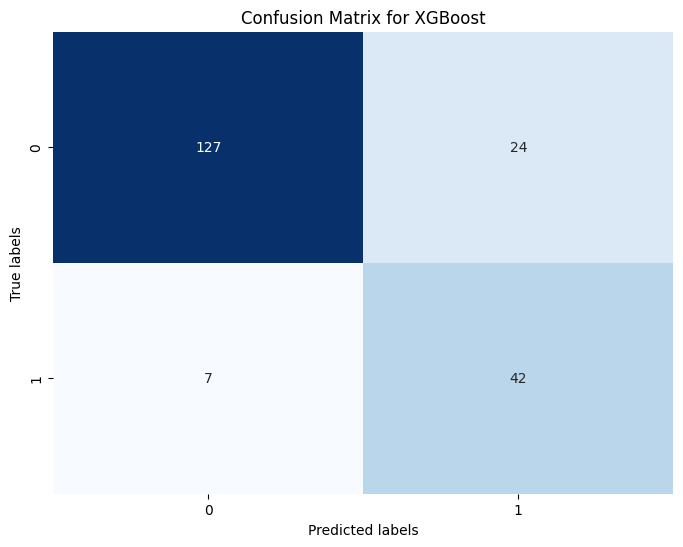

In [ ]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

### Tuned Model Explanation

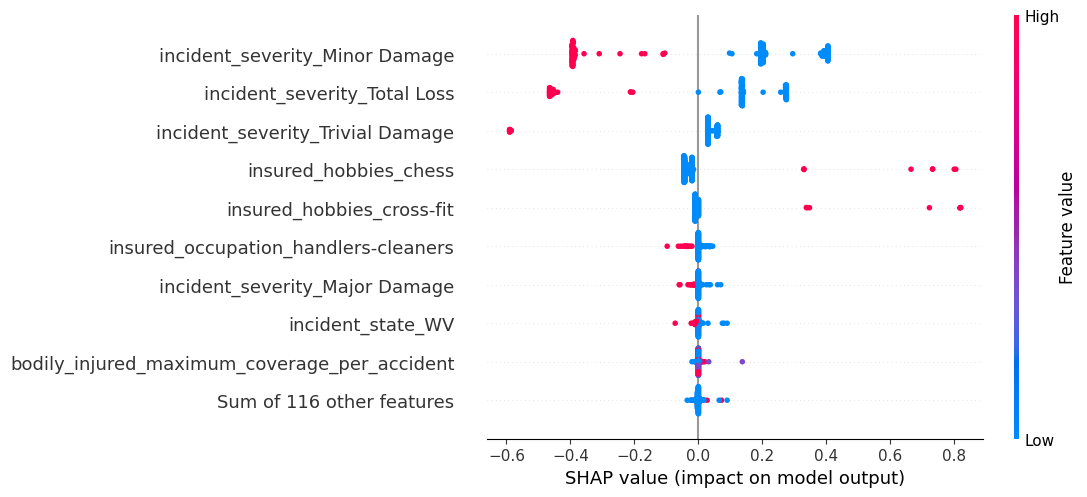

In [ ]:
xgb_model.shap_explanation()

<Axes: title={'center': 'Tuned XGBoost Feature Importance (ADASYN)'}, xlabel='F score', ylabel='Features'>

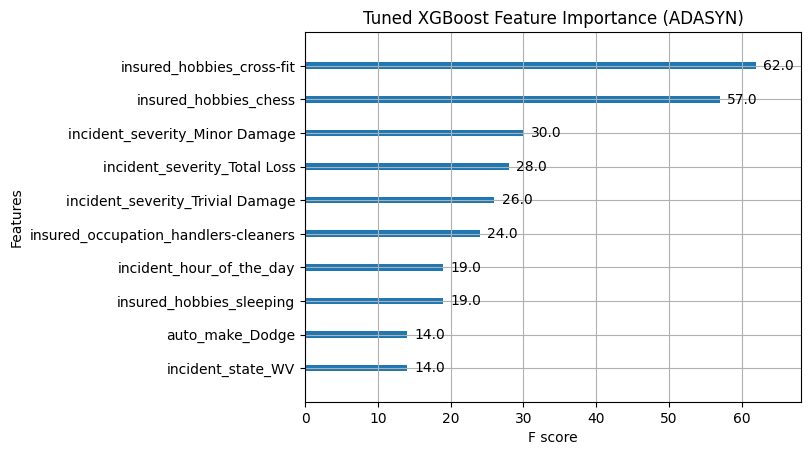

In [ ]:
xgb.plot_importance(xgb_model.tuned_model, title="Tuned XGBoost Feature Importance (ADASYN)", max_num_features=10)

# MLP

## Dataset creation

In [ ]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [ ]:
mlp_model.train_predict()
mlp_model.evaluate()

{'accuracy': 0.825,
 'precision': 0.6129032258064516,
 'recall': 0.7755102040816326,
 'f1_score': 0.6846846846846848}

In [ ]:
mlp_model.finetune()

[I 2024-04-07 16:23:19,637] A new study created in memory with name: no-name-be1b351c-151a-4955-8902-bbedbd808fcc
[I 2024-04-07 16:23:25,251] Trial 0 finished with value: 0.524515780980207 and parameters: {'hidden_layer_sizes': 70, 'alpha': 0.0025337416961595527, 'learning_rate_init': 0.006164926704677976, 'max_iter': 350}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:31,551] Trial 1 finished with value: 0.35508594983967073 and parameters: {'hidden_layer_sizes': 120, 'alpha': 0.0009697385133197264, 'learning_rate_init': 0.0027824169435152865, 'max_iter': 550}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:38,447] Trial 2 finished with value: 0.4194701938876551 and parameters: {'hidden_layer_sizes': 190, 'alpha': 0.0024827611755023375, 'learning_rate_init': 0.002502126907743748, 'max_iter': 650}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:44,860] Trial 3 finished with value: 0.39284282470868537 and parameters: {'hidden_l

(0.6747273734215314,
 {'hidden_layer_sizes': 170,
  'alpha': 0.0007957777623102827,
  'learning_rate_init': 0.0008892064354854472,
  'max_iter': 350})

In [ ]:
mlp_model.train_predict()

mlp_model.evaluate()

{'accuracy': 0.375,
 'precision': 0.27906976744186046,
 'recall': 0.9795918367346939,
 'f1_score': 0.4343891402714932}

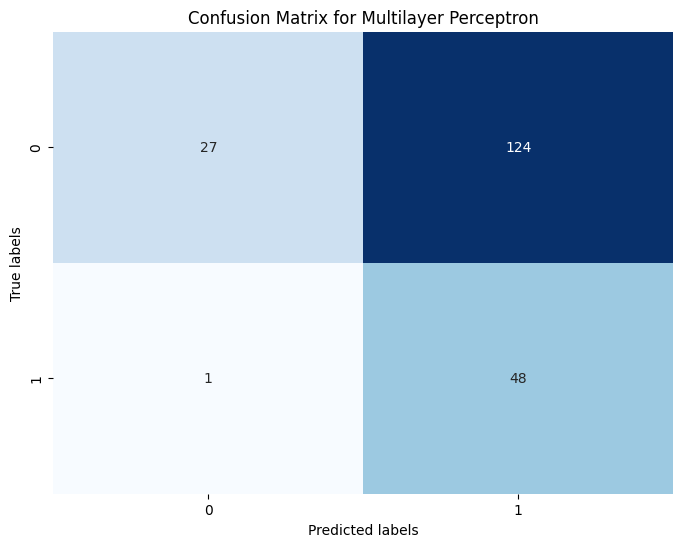

In [ ]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:13,  3.64it/s]                         


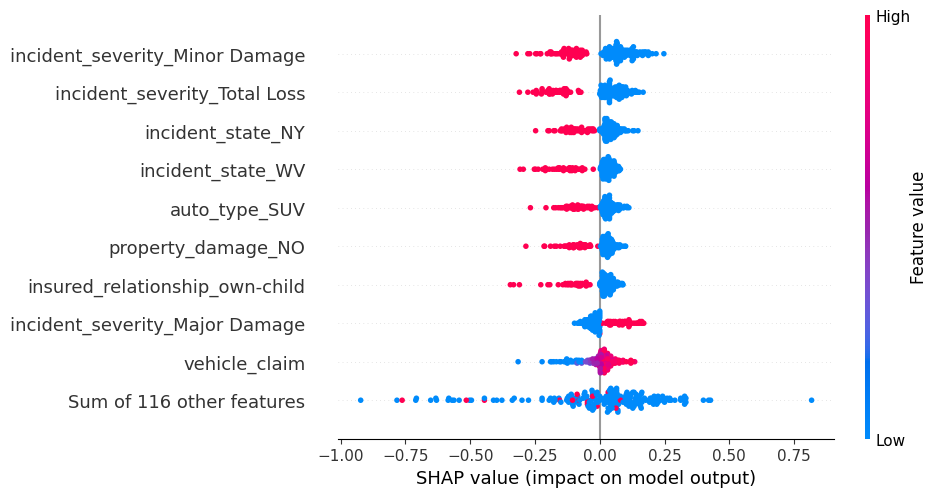

In [ ]:
mlp_model.shap_explanation()

# LightGBM

In [ ]:
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = False, # Gradient boosting agnostic to normalisation
    )

In [ ]:
import lightgbm as lgb


In [ ]:
lgb_static_params = {
    "random_state": 42,
    "verbose": -1,
}

lgb_model = models.IndividualModel(
    model_func=lgb.LGBMClassifier,
    param_info=parameters.LGBM_INFORMATION,
    X_train=X_train_lgb,
    X_test=X_test_lgb,
    y_train=y_train_lgb,
    y_test=y_test_lgb,
    static_params=lgb_static_params
)

In [ ]:
lgb_model.train_predict(baseline=True)
lgb_model.evaluate(baseline=True)

{'accuracy': 0.815,
 'precision': 0.6153846153846154,
 'recall': 0.6530612244897959,
 'f1_score': 0.6336633663366337}

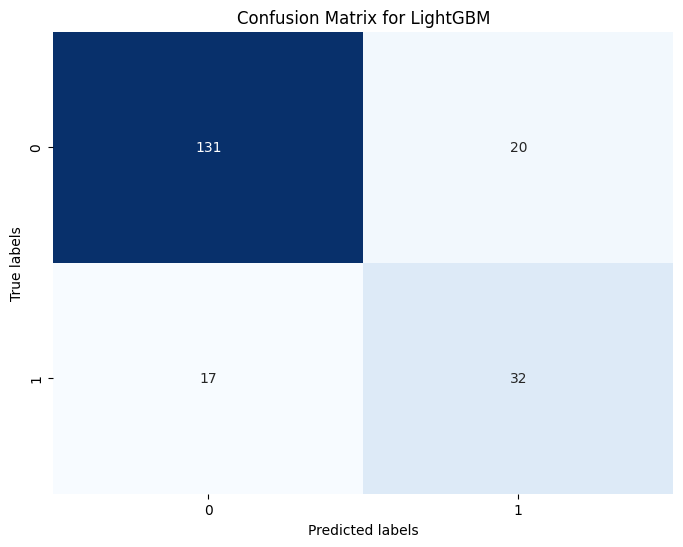

In [ ]:
cm_lgb = lgb_model.plot_confusion_matrix()

In [ ]:
lgb_model.finetune()

[I 2024-04-07 16:41:58,924] A new study created in memory with name: no-name-8a79988f-7e44-41ba-a8c4-14b5d054b19f
[I 2024-04-07 16:42:03,142] Trial 0 finished with value: 0.658339158052214 and parameters: {'n_estimators': 450, 'num_leaves': 15, 'learning_rate': 0.02234144976671305, 'subsample': 0.8, 'colsample_bytree': 0.3, 'min_child_samples': 18, 'reg_alpha': 0.7675095598866005, 'reg_lambda': 9.214540981056633e-07}. Best is trial 0 with value: 0.658339158052214.
[I 2024-04-07 16:42:06,959] Trial 1 finished with value: 0.6560443869498253 and parameters: {'n_estimators': 350, 'num_leaves': 2, 'learning_rate': 0.11002556613912648, 'subsample': 0.7, 'colsample_bytree': 0.6000000000000001, 'min_child_samples': 26, 'reg_alpha': 2.378272465699319e-06, 'reg_lambda': 2.8513060618083252}. Best is trial 0 with value: 0.658339158052214.
[I 2024-04-07 16:42:11,078] Trial 2 finished with value: 0.6698503952882152 and parameters: {'n_estimators': 200, 'num_leaves': 154, 'learning_rate': 0.072739837

(0.7562870820935338,
 {'n_estimators': 100,
  'num_leaves': 155,
  'learning_rate': 0.015381040876633353,
  'subsample': 1.0,
  'colsample_bytree': 0.8,
  'min_child_samples': 15,
  'reg_alpha': 3.272239554871888,
  'reg_lambda': 1.8722057238011285e-07})

In [ ]:
lgb_model.train_predict()
lgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

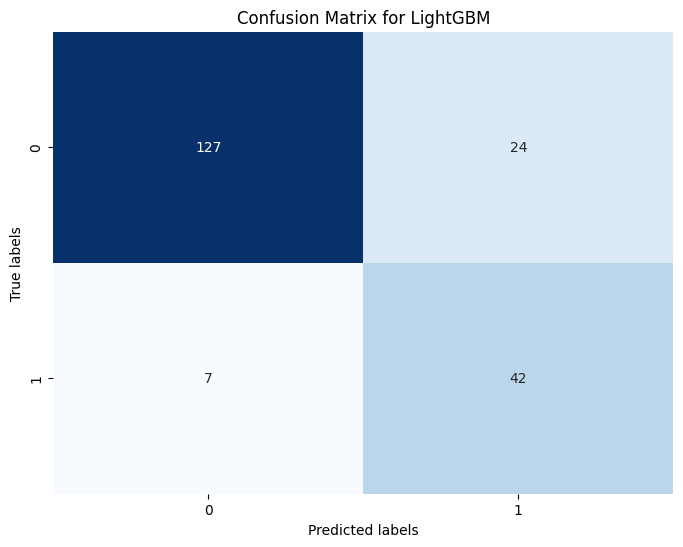

In [ ]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:13,  3.65it/s]                         


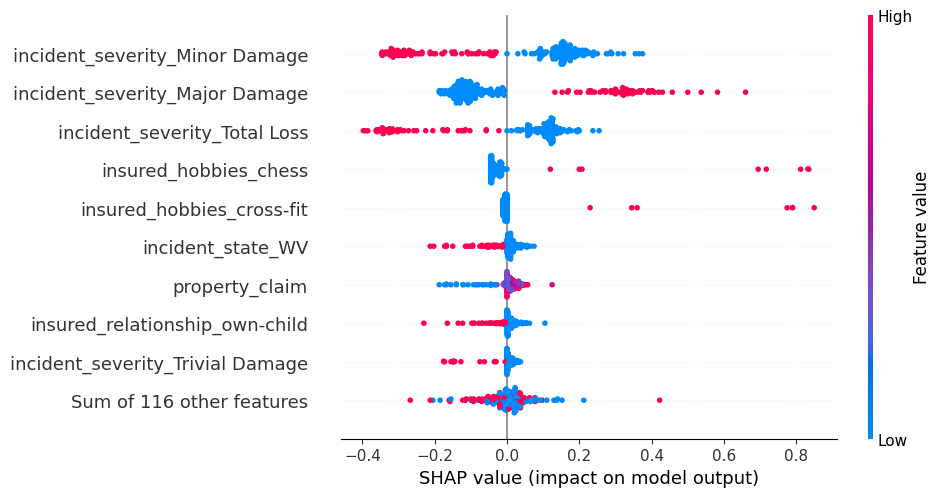

In [ ]:
lgb_model.shap_explanation()

### What if i used random oversampling instead?

In [ ]:
lgb_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-07 16:53:05,900] A new study created in memory with name: no-name-c654f598-7959-4691-8dbf-0e430ccf540e


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 16:53:06,291] Trial 0 finished with value: 0.7302790100784584 and parameters: {'n_estimators': 150, 'num_leaves': 56, 'learning_rate': 0.003926515932399185, 'subsample': 0.55, 'colsample_bytree': 1.0, 'min_child_samples': 20, 'reg_alpha': 1.0794973315089333, 'reg_lambda': 1.0611802077860777}. Best is trial 0 with value: 0.7302790100784584.
[I 2024-04-07 16:53:06,950] Trial 1 finished with value: 0.6821488314229753 and parameters: {'n_estimators': 150, 'num_leaves': 164, 'learning_rate': 0.07348220941804862, 'subsample': 0.7, 'colsample_bytree': 1.0, 'min_child_samples': 12, 'reg_alpha': 1.1534225883468407e-05, 'reg_lambda': 0.05299532956867544}. Best is trial 0 with value: 0.7302790100784584.
[I 2024-04-07 16:53:07,593] Trial 2 finished with value: 0.45611229350359783 and parameters: {'n_estimators': 250, 'num_leaves': 36, 'learning_rate': 0.008061605804477269, 'subsample': 0.25, 'colsample_bytree': 0.15000000000000002, 'min_child_samples': 13, 'reg_alpha': 1.199718731789

(0.7574368559201725,
 {'n_estimators': 350,
  'num_leaves': 4,
  'learning_rate': 0.032158660448341,
  'subsample': 0.30000000000000004,
  'colsample_bytree': 0.9000000000000001,
  'min_child_samples': 3,
  'reg_alpha': 6.235920630554453,
  'reg_lambda': 2.810666886928073e-06})

In [ ]:
lgb_model.train_predict(oversampling_strategy = 'RandomOverSampler')
lgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

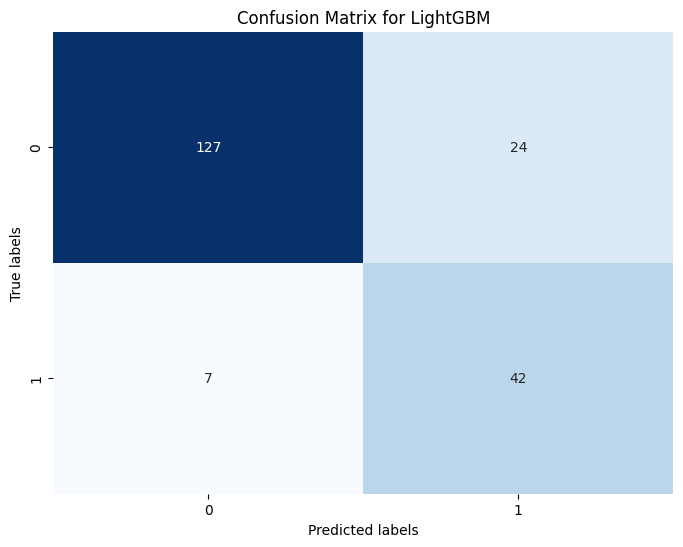

In [ ]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:16,  4.71it/s]                         


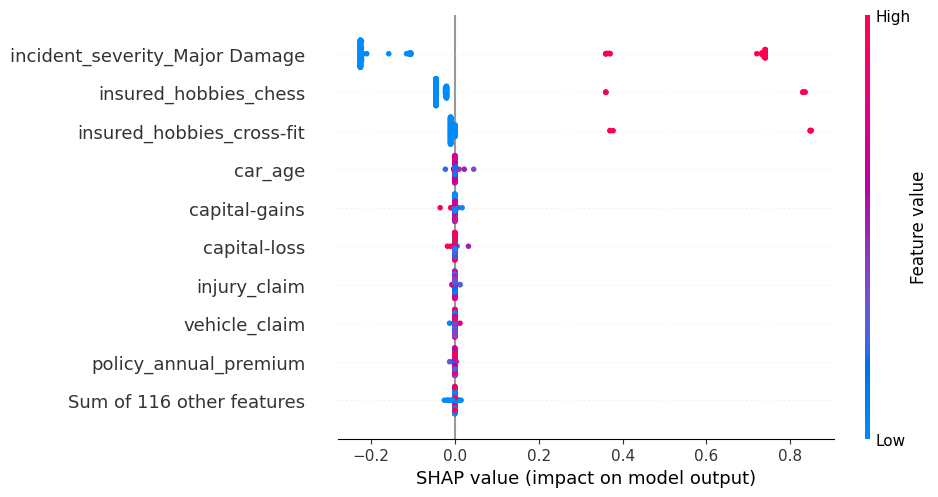

In [ ]:
lgb_model.shap_explanation()

### What if I used ADASYN instead?

In [ ]:
lgb_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-07 17:00:20,214] A new study created in memory with name: no-name-360f104b-a595-4df8-8bb4-17cf4451dc3a


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:00:20,829] Trial 0 finished with value: 0.5582204288920706 and parameters: {'n_estimators': 250, 'num_leaves': 31, 'learning_rate': 0.15333832163983524, 'subsample': 0.7, 'colsample_bytree': 0.2, 'min_child_samples': 28, 'reg_alpha': 0.00019610242115319815, 'reg_lambda': 2.319584533755093e-08}. Best is trial 0 with value: 0.5582204288920706.
[I 2024-04-07 17:00:22,368] Trial 1 finished with value: 0.62235214576678 and parameters: {'n_estimators': 300, 'num_leaves': 152, 'learning_rate': 0.039370104728998725, 'subsample': 0.65, 'colsample_bytree': 0.9500000000000001, 'min_child_samples': 17, 'reg_alpha': 1.530562130809748e-05, 'reg_lambda': 1.6818359674234365e-08}. Best is trial 1 with value: 0.62235214576678.
[I 2024-04-07 17:00:22,800] Trial 2 finished with value: 0.595055173137365 and parameters: {'n_estimators': 200, 'num_leaves': 12, 'learning_rate': 0.10556621314463145, 'subsample': 1.0, 'colsample_bytree': 0.3, 'min_child_samples': 28, 'reg_alpha': 0.000144028881

(0.7186126063474287,
 {'n_estimators': 450,
  'num_leaves': 5,
  'learning_rate': 0.00896419588265798,
  'subsample': 0.4,
  'colsample_bytree': 0.8,
  'min_child_samples': 21,
  'reg_alpha': 6.247761828699088e-07,
  'reg_lambda': 0.0784485085616853})

In [ ]:
lgb_model.train_predict(oversampling_strategy = 'ADASYN')
lgb_model.evaluate()

{'accuracy': 0.85,
 'precision': 0.6507936507936508,
 'recall': 0.8367346938775511,
 'f1_score': 0.7321428571428571}

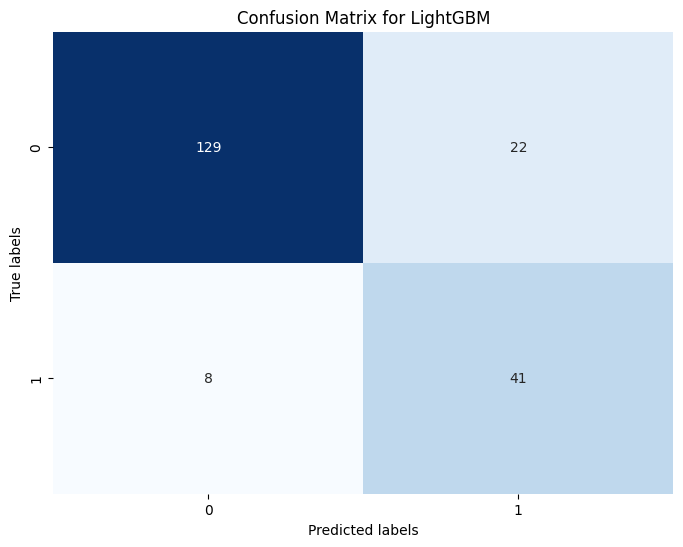

In [ ]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:20,  5.03it/s]                         


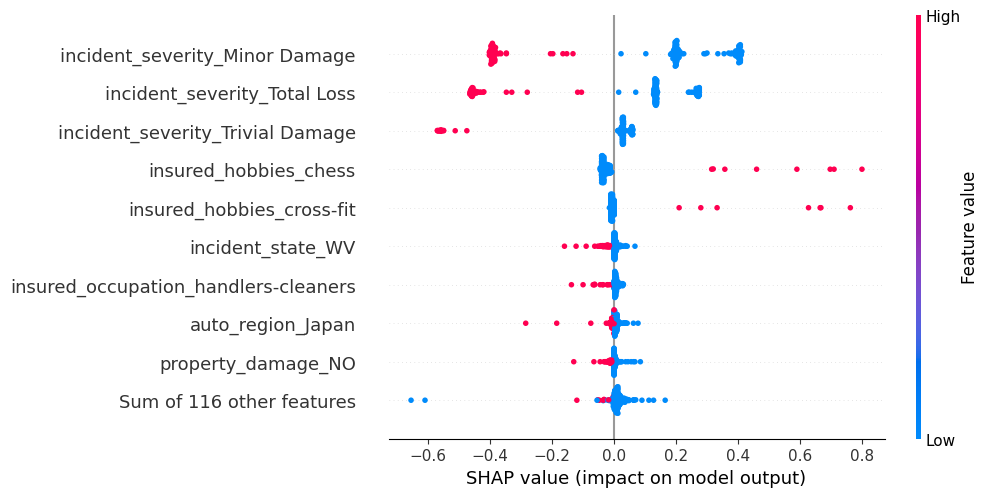

In [ ]:
lgb_model.shap_explanation()

# Logistic Regression

In [8]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # LR needs normalisation
    )

In [9]:
from sklearn.linear_model import LogisticRegression

lr_static_params = {
    "max_iter": 10000
}
lr_model = models.IndividualModel(
    model_func= LogisticRegression,
    param_info=parameters.LOGISTIC_REGRESSION_INFORMATION,
    X_train=X_train_lr,
    X_test=X_test_lr,
    y_train=y_train_lr,
    y_test=y_test_lr,
    static_params = lr_static_params
)

## Baseline

In [10]:

# Train the model
lr_model.train(baseline=True)

# Predict labels for the test set
lr_model.predict(baseline=True)

# Evaluate
lr_model.evaluate(baseline=True)

{'accuracy': 0.82,
 'precision': 0.6666666666666666,
 'recall': 0.5306122448979592,
 'f1_score': 0.5909090909090909}

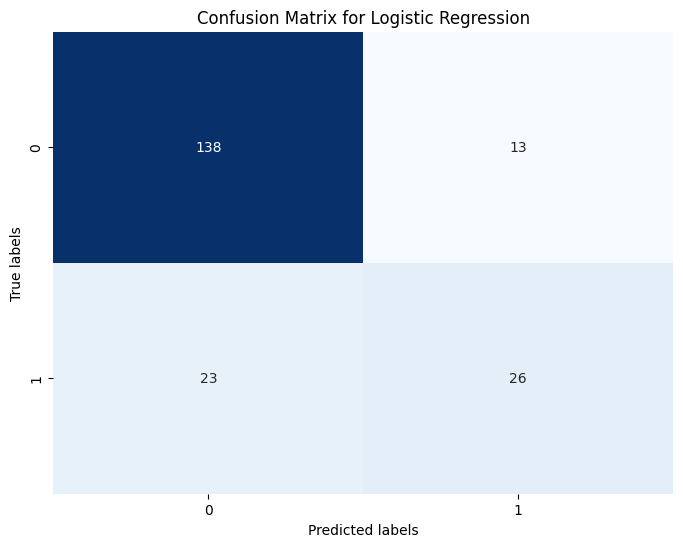

In [11]:
cm_lr_base = lr_model.plot_confusion_matrix()

## With Tuning

In [12]:
lr_model.finetune()

[I 2024-04-11 02:47:59,322] A new study created in memory with name: no-name-032a8d53-48e5-4081-afba-fb05947e0156
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-04-11 02:48:03,462] Trial 0 finished with value: 0.6304515769711017 and parameters: {'penalty': None, 'C': 2.4000000000000004, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6304515769711017.
[I 2024-04-11 02:48:39,619] Trial 1 finished with value: 0.5866317778082484 and parameters: {'penalty': 'l2', 'C': 8.9, 'solver': 'saga'}. Best is trial 0 with valu

(0.6538001580284879, {'penalty': 'l2', 'C': 9.9, 'solver': 'lbfgs'})

In [13]:
lr_model.train_predict()
lr_model.evaluate()

{'accuracy': 0.81,
 'precision': 0.6341463414634146,
 'recall': 0.5306122448979592,
 'f1_score': 0.5777777777777778}

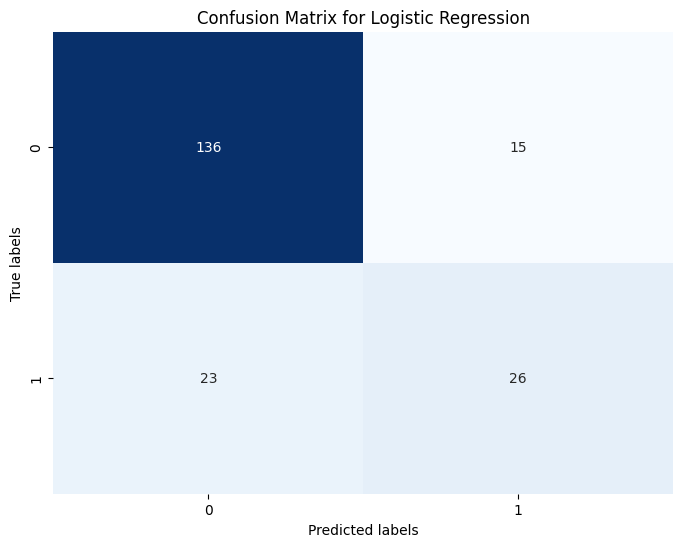

In [14]:
cm_lr_base = lr_model.plot_confusion_matrix()

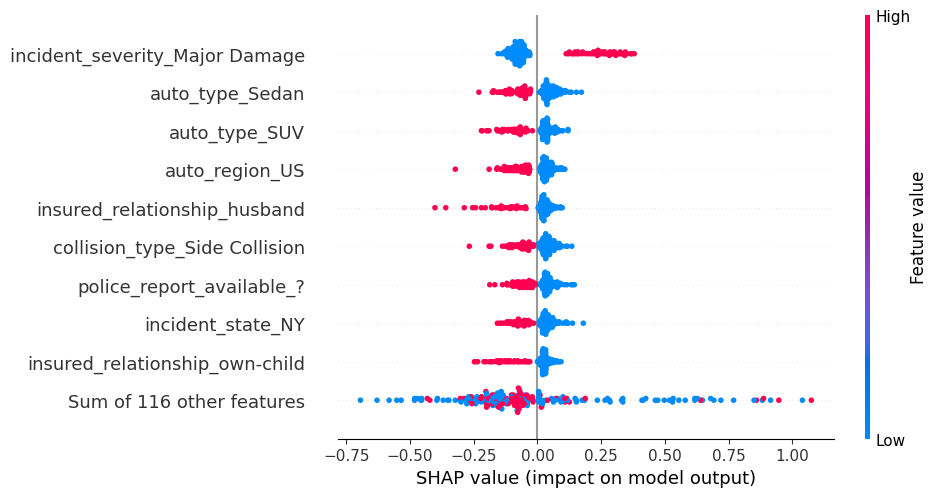

In [15]:
lr_model.shap_explanation()

## Using Random Oversampling Instead

In [16]:
lr_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-11 03:02:47,366] A new study created in memory with name: no-name-7e6d7baa-a325-485c-ae7c-e90084045384


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:03:20,827] Trial 0 finished with value: 0.5483436141877606 and parameters: {'penalty': 'l2', 'C': 8.4, 'solver': 'saga'}. Best is trial 0 with value: 0.5483436141877606.
[I 2024-04-11 03:03:21,660] Trial 1 finished with value: 0.6468141519595657 and parameters: {'penalty': 'l2', 'C': 2.7, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.6468141519595657.
[I 2024-04-11 03:03:54,225] Trial 2 finished with value: 0.5483436141877606 and parameters: {'penalty': 'l2', 'C': 7.4, 'solver': 'saga'}. Best is trial 1 with value: 0.6468141519595657.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

(0.6857728471505561, {'penalty': 'l2', 'C': 0.6, 'solver': 'lbfgs'})

In [17]:
lr_model.train_predict(oversampling_strategy = 'RandomOverSampler')
lr_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.6379310344827587,
 'recall': 0.7551020408163265,
 'f1_score': 0.6915887850467289}

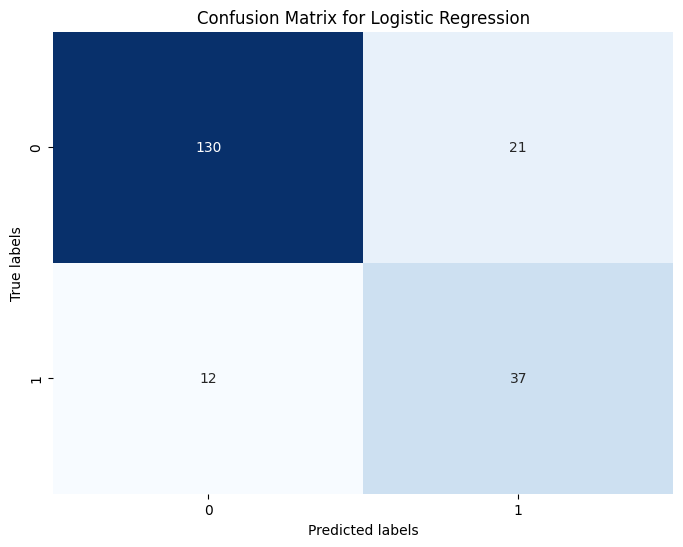

In [18]:
cm_lr = lr_model.plot_confusion_matrix()

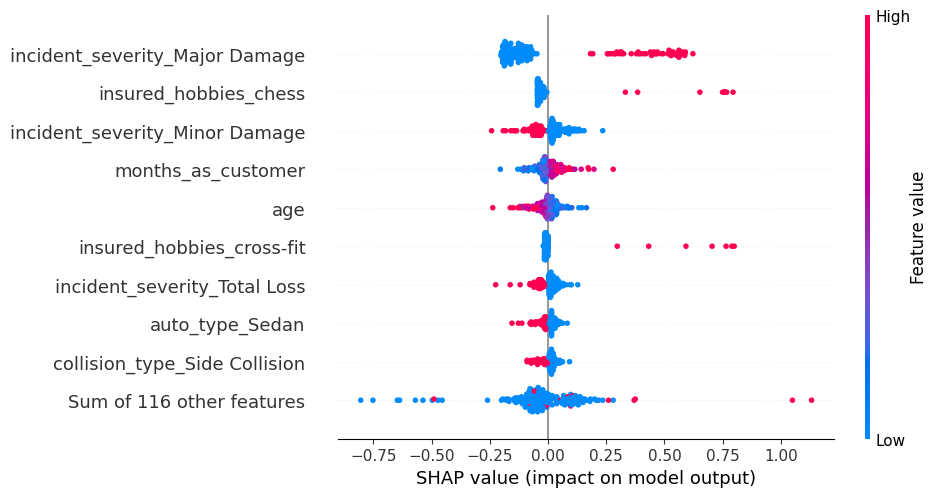

In [19]:
lr_model.shap_explanation()

## Using ADASYN

In [20]:
lr_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-11 03:13:11,103] A new study created in memory with name: no-name-0dbf80bb-f81c-4d52-8293-3af538d4f91e


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:13:42,456] Trial 0 finished with value: 0.5516561743419293 and parameters: {'penalty': 'l2', 'C': 0.9, 'solver': 'saga'}. Best is trial 0 with value: 0.5516561743419293.
[I 2024-04-11 03:13:43,277] Trial 1 finished with value: 0.6484411773867196 and parameters: {'penalty': 'l2', 'C': 6.6, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.6484411773867196.
[I 2024-04-11 03:14:15,740] Trial 2 finished with value: 0.5516561743419293 and parameters: {'penalty': 'l2', 'C': 3.8000000000000003, 'solver': 'saga'}. Best is trial 1 with value: 0.6484411773867196.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:118

(0.6620891070651836, {'penalty': 'l2', 'C': 4.8, 'solver': 'lbfgs'})

In [21]:
lr_model.train_predict(oversampling_strategy = 'ADASYN')
lr_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6829268292682927,
 'recall': 0.5714285714285714,
 'f1_score': 0.6222222222222223}

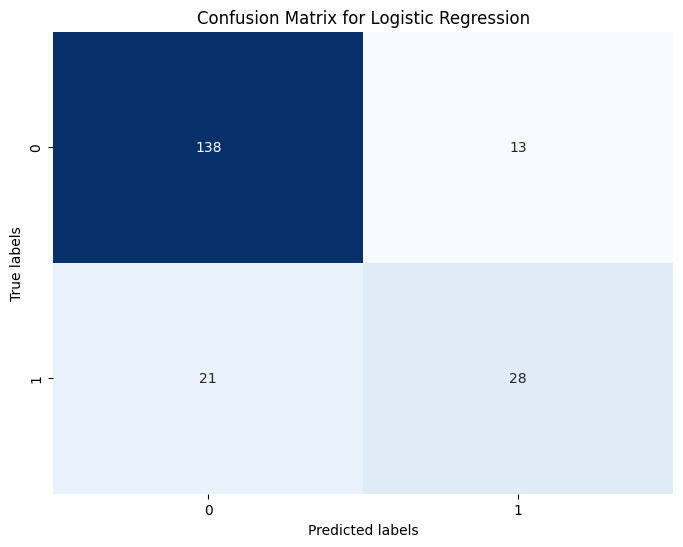

In [22]:
cm_lr = lr_model.plot_confusion_matrix()

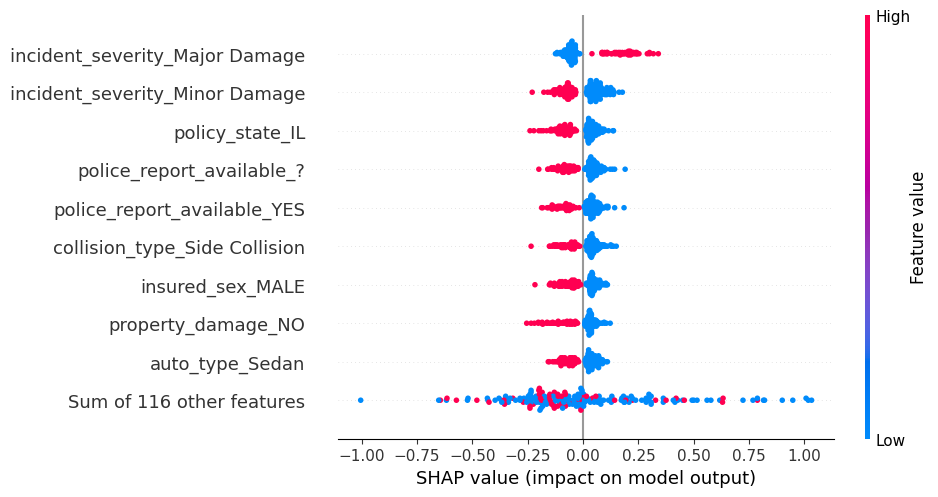

In [23]:
lr_model.shap_explanation()

# Support Vector Machine

In [24]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # SVM needs normalisation
    )

In [25]:
from sklearn import svm

svm_static_params = {
    "cache_size": 500,
    "probability": False,
    "gamma": 'scale'
}

svm_model = models.IndividualModel(
    model_func= svm.SVC,
    param_info=parameters.SVM_INFORMATION,
    X_train=X_train_svm,
    X_test=X_test_svm,
    y_train=y_train_svm,
    y_test=y_test_svm,
    static_params = svm_static_params
)

In [26]:
# Train the model
svm_model.train(baseline=True)

# Predict labels for the test set
svm_model.predict(baseline=True)

# Evaluate
svm_model.evaluate(baseline=True)

{'accuracy': 0.7,
 'precision': 0.43373493975903615,
 'recall': 0.7346938775510204,
 'f1_score': 0.5454545454545455}

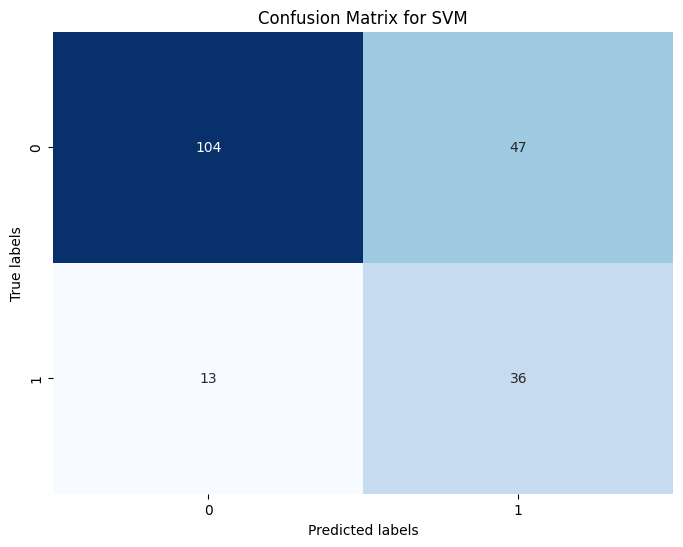

In [27]:
cm_svm_base = svm_model.plot_confusion_matrix()

## With Tuning

In [28]:
svm_model.finetune()

[I 2024-04-11 03:23:41,600] A new study created in memory with name: no-name-44afcccb-484b-4379-89b4-7ce73f966b1e
[I 2024-04-11 03:23:44,395] Trial 0 finished with value: 0.6134893182402116 and parameters: {'C': 0.02084044118287074, 'kernel': 'linear', 'degree': 2, 'coef0': 0.67872715715286}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:47,271] Trial 1 finished with value: 0.5116121646508387 and parameters: {'C': 17.414704098630786, 'kernel': 'poly', 'degree': 5, 'coef0': 0.6097146178996163}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:50,160] Trial 2 finished with value: 0.5116121646508387 and parameters: {'C': 1.80158948830285, 'kernel': 'poly', 'degree': 5, 'coef0': 0.5201960141601648}. Best is trial 0 with value: 0.6134893182402116.
[I 2024-04-11 03:23:54,138] Trial 3 finished with value: 0.5116121646508387 and parameters: {'C': 0.1470460793286026, 'kernel': 'rbf', 'degree': 2, 'coef0': 0.40890816935450003}. Best is trial 0 with value:

(0.6593941713344699,
 {'C': 0.1147381195272408,
  'kernel': 'linear',
  'degree': 5,
  'coef0': 0.3112230529348774})

In [29]:
svm_model.train_predict()
svm_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.6666666666666666,
 'recall': 0.6938775510204082,
 'f1_score': 0.6799999999999999}

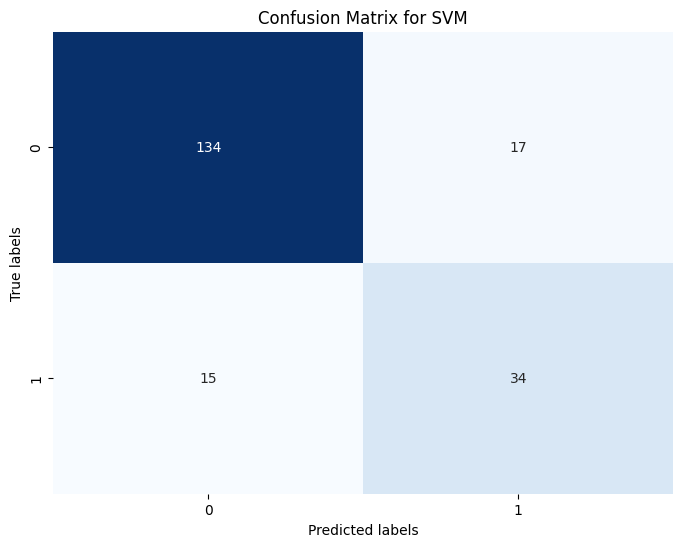

In [30]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:50,  1.64it/s]


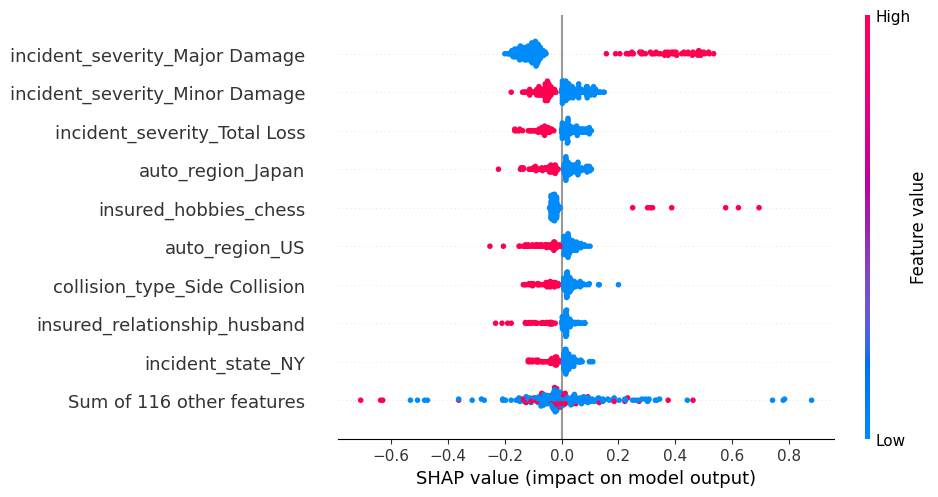

In [31]:
svm_model.shap_explanation()

## Using Random Oversampling

In [32]:
svm_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-11 03:30:41,833] A new study created in memory with name: no-name-e010c799-59b6-4762-8038-9f22ebc59ba1


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:30:42,211] Trial 0 finished with value: 0.478021164021164 and parameters: {'C': 9.285049169488891, 'kernel': 'sigmoid', 'degree': 3, 'coef0': 0.12455519447472642}. Best is trial 0 with value: 0.478021164021164.
[I 2024-04-11 03:30:42,576] Trial 1 finished with value: 0.4801085972850679 and parameters: {'C': 1.2186333703651233, 'kernel': 'sigmoid', 'degree': 2, 'coef0': 0.36213855120857735}. Best is trial 1 with value: 0.4801085972850679.
[I 2024-04-11 03:30:42,982] Trial 2 finished with value: 0.4772483164908628 and parameters: {'C': 0.13853742836120175, 'kernel': 'sigmoid', 'degree': 3, 'coef0': 0.2702676766196028}. Best is trial 1 with value: 0.4801085972850679.
[I 2024-04-11 03:30:43,218] Trial 3 finished with value: 0.6328016577176712 and parameters: {'C': 1.2793673314349316, 'kernel': 'linear', 'degree': 3, 'coef0': 0.764283488242219}. Best is trial 3 with value: 0.6328016577176712.
[I 2024-04-11 03:30:43,417] Trial 4 finished with value: 0.6749190658965096 and pa

(0.7466247379454926,
 {'C': 0.04626198505227364,
  'kernel': 'linear',
  'degree': 4,
  'coef0': 0.2038310856711941})

In [33]:
svm_model.train_predict(oversampling_strategy = 'RandomOverSampler')
svm_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

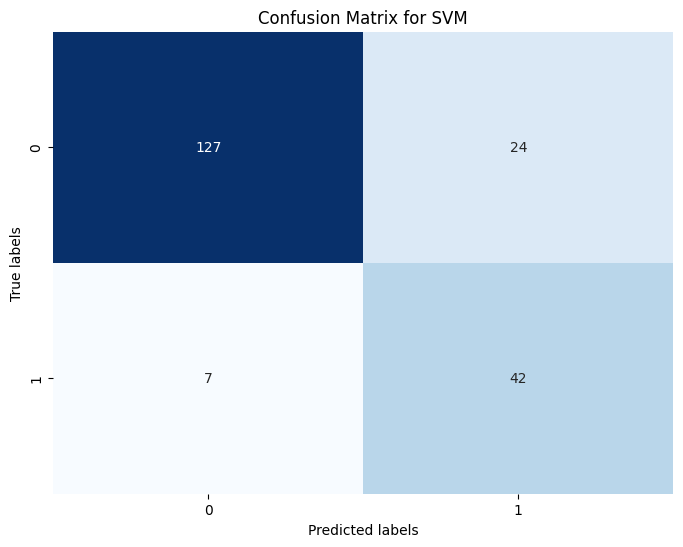

In [34]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [02:42,  1.16it/s]


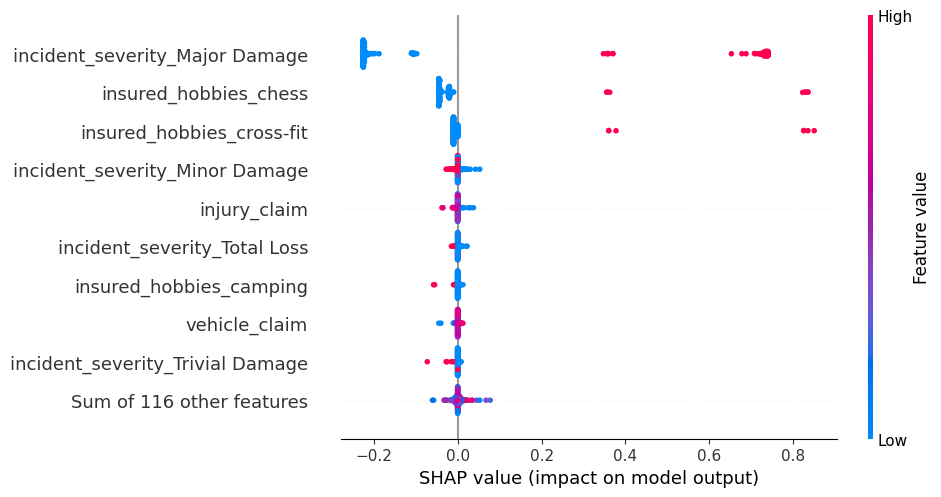

In [35]:
svm_model.shap_explanation()

## Using ADASYN

In [36]:
svm_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-11 03:33:51,915] A new study created in memory with name: no-name-68cdaead-4fc4-4007-b083-bf3642564218


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-11 03:33:52,280] Trial 0 finished with value: 0.5878208814534608 and parameters: {'C': 29.117636199508404, 'kernel': 'linear', 'degree': 2, 'coef0': 0.13631336898969557}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:52,549] Trial 1 finished with value: 0.0 and parameters: {'C': 7.707890403821047, 'kernel': 'poly', 'degree': 3, 'coef0': 0.5245839789717116}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:52,797] Trial 2 finished with value: 0.0 and parameters: {'C': 1.3825777672110997, 'kernel': 'poly', 'degree': 4, 'coef0': 0.18105218033762038}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:53,119] Trial 3 finished with value: 0.0 and parameters: {'C': 0.29741565158050237, 'kernel': 'rbf', 'degree': 3, 'coef0': 0.17711051179567347}. Best is trial 0 with value: 0.5878208814534608.
[I 2024-04-11 03:33:53,307] Trial 4 finished with value: 0.6261883403011685 and parameters: {'C': 0.44098187456903926, 'kernel': 'lin

(0.6883252467793208,
 {'C': 0.1012009517644189,
  'kernel': 'linear',
  'degree': 4,
  'coef0': 0.45700752835811626})

In [37]:
svm_model.train_predict(oversampling_strategy = 'ADASYN')
svm_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

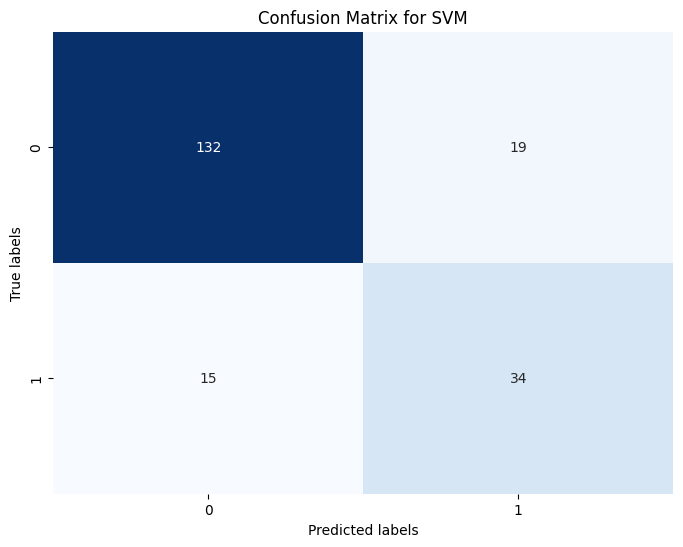

In [38]:
cm_svm = svm_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:53,  1.61it/s]


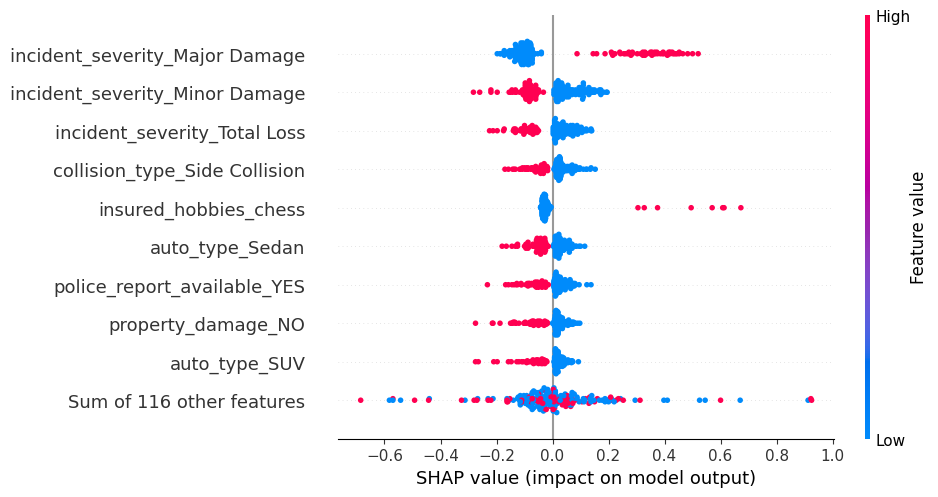

In [39]:
svm_model.shap_explanation()